In [1]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Preprocessing

df = pd.read_csv("movie_metadata.tsv", sep = '\t', header = None)

columns_to_drop = [1, 3, 4, 5 ,6,7]
df = df.drop(columns=columns_to_drop)
df.columns = ["movie_id","movie_name","genre"]

# Convert string representations of dictionaries to actual dictionaries
df['genre'] = df['genre'].apply(ast.literal_eval)

# Extracting genres
df['genres'] = df['genre'].apply(lambda x: list(x.values()))

# Cleaning genres
df['genres'] = df['genres'].apply(lambda x: [genre.strip() for genre in x])

# Dropping the original 'genre' column
df.drop(columns=['genre'], inplace=True)

file_path = 'plot_summaries.txt'

# Lists to store movie IDs and plots
movie_ids = []
plots = []

# Open the text file and read line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Split each line into movie ID and plot using tab separation
        movie_id, plot = line.strip().split('\t', 1)
        # Append movie ID and plot to their respective lists
        movie_ids.append(movie_id)
        plots.append(plot)

# Create a DataFrame from the lists
df2 = pd.DataFrame({'movie_id': movie_ids, 'plot': plots})
df2['movie_id'] = df2['movie_id'].astype(int)

# Merge df and df2 based on 'movie_id'
merged_df = pd.merge(df, df2, on='movie_id', how='inner')

# Display the merged DataFrame
merged_df




,movie_id,movie_name,genres,plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."
...,...,...,...,...
42202,23851782,The Ghost Train,"[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...
42203,35228177,Mermaids: The Body Found,[Drama],Two former National Oceanic Atmospheric Admini...
42204,34980460,Knuckle,"[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...
42205,913762,The Super Dimension Fortress Macross II: Lover...,"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup..."


C:\Users\HP\AppData\Local\Temp\ipykernel_3032\2333006126.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_genres.index, y=top_25_genres.values, palette='viridis')


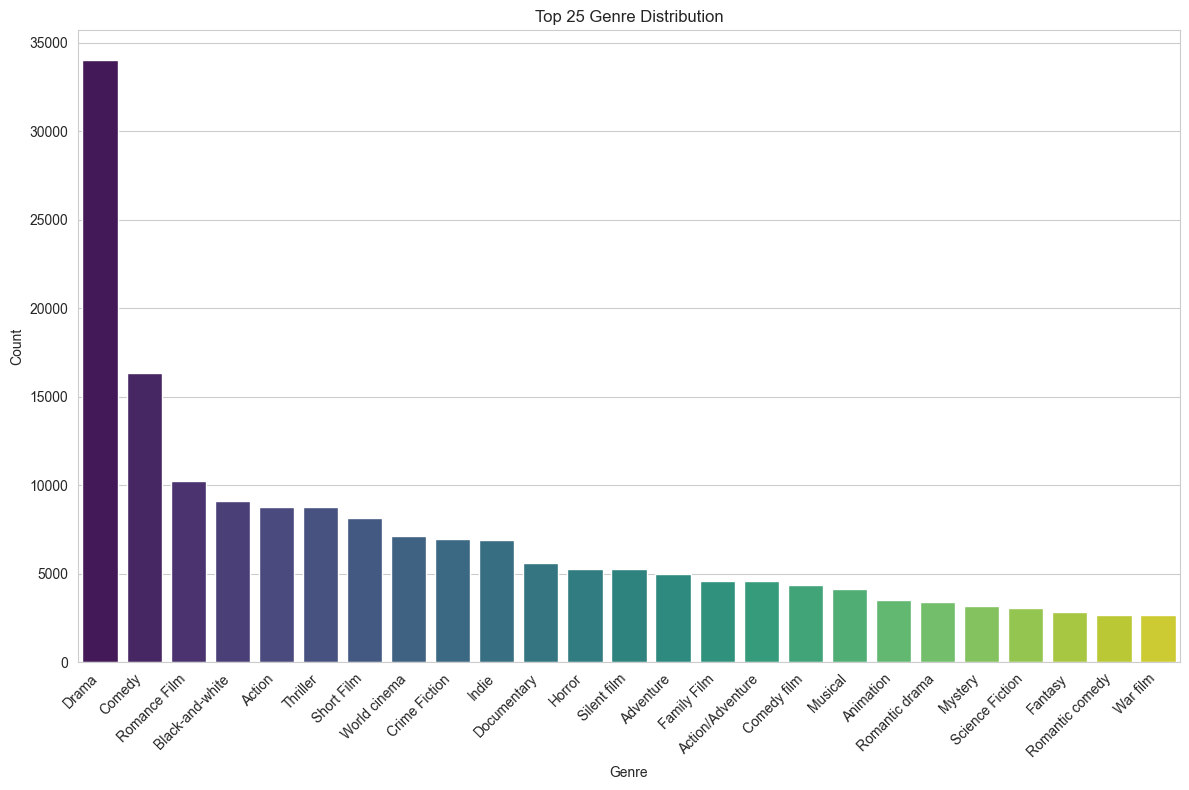

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the genre information

# Explode the genres column to have each genre as a separate row
exploded_genres = df['genres'].explode()

# Count the occurrences of each genre
genre_counts = exploded_genres.value_counts()

# Select the top 25 genres
top_25_genres = genre_counts.head(25)

# Creating a bar plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_genres.index, y=top_25_genres.values, palette='viridis')

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 25 Genre Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()


In [2]:
#1 No. of Nodes

# Splitting genres into a list
merged_df["genres_list"] = merged_df["genres"].str.split("|")

# Calculating the total number of genres
total_genres = merged_df["genres_list"].explode().nunique()

# Calculating the total number of movies
total_movies = len(merged_df)

print(f"Total nodes: {total_movies}")
print()


Total nodes: 42207



In [25]:
#2 Number of Edges

# Extracting relevant columns
movies_subset = df[['movie_name', 'genres']]

# Creating a dictionary to store genres for each movie
movie_genres = {}

# Populating the dictionary
for _, row in movies_subset.iterrows():
    movie_title = row['movie_name']
    genres = row['genres']
    movie_genres[movie_title] = genres

In [6]:
import random

# Get a list of nodes from the graph
nodes_list = list(movie_genres.keys())

# Select a random subset of 100 nodes
subset_nodes = random.sample(nodes_list, 10000)

edges = set()  # Use a set to ensure uniqueness of edges
visited_movies = set()  # Keep track of visited movies

for movie1 in subset_nodes:
    visited_movies.add(movie1)  # Mark movie1 as visited
    for movie2 in subset_nodes:
        if movie2 not in visited_movies:  
            genres1 = movie_genres[movie1]
            genres2 = movie_genres[movie2]
            common_genres = set(genres1) & set(genres2)
            if common_genres:
                # Ensure movie1 comes before movie2 in the edge tuple to avoid duplicates
                edge = (movie1, movie2, tuple(common_genres))  
                edges.add(edge)

# Calculating the total number of edges
total_edges = len(edges)
print(f"Total number of edges: {total_edges}")


Total number of edges: 14522763


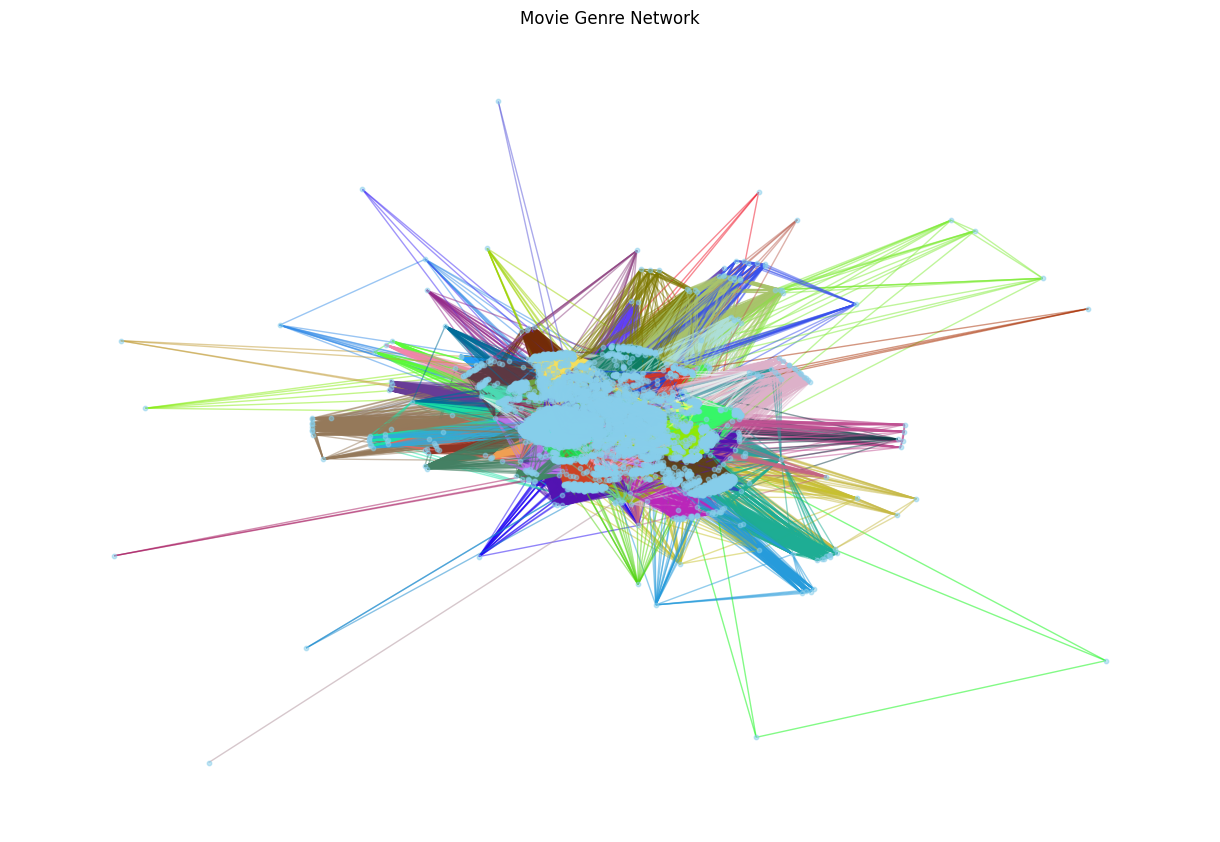

In [23]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Get a list of nodes from the graph
nodes_list = random.sample(list(movie_genres.keys()), 10000)

# Initialize an empty graph
G = nx.Graph()

# Adding nodes (movies) to the graph with genres as attributes
for movie_title in nodes_list:
    G.add_node(movie_title, genres=movie_genres[movie_title])

# Adding edges (shared genres) to the graph
for movie1 in nodes_list:
    for movie2 in nodes_list:
        if movie1 != movie2:
            genres1 = movie_genres[movie1]
            genres2 = movie_genres[movie2]
            common_genres = set(genres1) & set(genres2)
            if common_genres:
                G.add_edge(movie1, movie2, common_genres=common_genres)

# Removing isolated nodes (nodes with no edges)
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
G.remove_nodes_from(isolated_nodes)

# Assigning random colors to genres
genre_colors = {}
for genre in unique_genres:
    # Generate a random color in hexadecimal format
    color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
    genre_colors[genre] = color

# Function to assign colors to genres
def assign_genre_color(genres):
    # If there are multiple common genres, pick a random one and assign its color
    genre = random.choice(list(genres))
    return genre_colors.get(genre, 'gray')

# Coloring edges based on their common genres
edge_colors = []
for u, v, attrs in G.edges(data=True):
    common_genres = attrs['common_genres']
    if common_genres:
        edge_colors.append(assign_genre_color(common_genres))  # Assign random color based on common genres
    else:
        edge_colors.append('gray')  # Gray color for edges without common genres

# Visualizing the graph with modified parameters
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.1)  # Adjust 'k' to control the distance between nodes
nx.draw(G, pos, with_labels=False, node_size=10, font_size=8, node_color='skyblue', edge_color=edge_colors, alpha=0.5)  # Adjust node_size and alpha
plt.title("Movie Genre Network")
plt.show()


In [29]:
# Highest Degree Node

# Computing the degree of each node
degree_dict = dict(G.degree())

# Finding the node(s) with the highest degree
max_degree = max(degree_dict.values())
highest_degree_nodes = [node for node, degree in degree_dict.items() if degree == max_degree]

# Printing the highest degree and corresponding movie title(s)
for node in highest_degree_nodes:
    print(f"Highest degree: {max_degree} (Movie Title: {node})")
    

Highest degree: 7178 (Movie Title: Ichi the Killer)


In [30]:
# Checking if the graph is weighted
is_weighted = nx.is_weighted(G)

if is_weighted:
    print("The graph is weighted.")
else:
    print("The graph is not weighted.")

The graph is not weighted.


In [32]:
# Computing degree centrality
deg_centrality = nx.degree_centrality(G)

# Printing degree centrality for each movie
for movie, centrality in deg_centrality.items():
    print(f"{movie}: Degree Centrality = {centrality:.4f}")
    

Gridiron Gang: Degree Centrality = 0.4658
Palkon Ki Chhaon Mein: Degree Centrality = 0.4691
Heb Medelij Jet: Degree Centrality = 0.2128
The Greatest Wish in the World: Degree Centrality = 0.5094
Box Car Bandit: Degree Centrality = 0.2080
Tom Toms of Mayumba: Degree Centrality = 0.0598
A Little Life-Opera: Degree Centrality = 0.4402
Shadow Man: Degree Centrality = 0.4398
Aitbaar: Degree Centrality = 0.1780
Filming The Trial: Degree Centrality = 0.0777
Three: Degree Centrality = 0.4398
Teenage Thunder: Degree Centrality = 0.4268
King George and the Ducky: Degree Centrality = 0.3429
La Putain respectueuse: Degree Centrality = 0.4268
Step Up 4ever: Degree Centrality = 0.5011
American Cousins: Degree Centrality = 0.6839
A Yank in Viet-Nam: Degree Centrality = 0.1343
Dead Lenny: Degree Centrality = 0.3210
Kandagawa Pervert Wars: Degree Centrality = 0.0006
December Heat: Degree Centrality = 0.5041
Hilary Duff: Learning to Fly: Degree Centrality = 0.1064
Crossover between Codename: Kids Next D

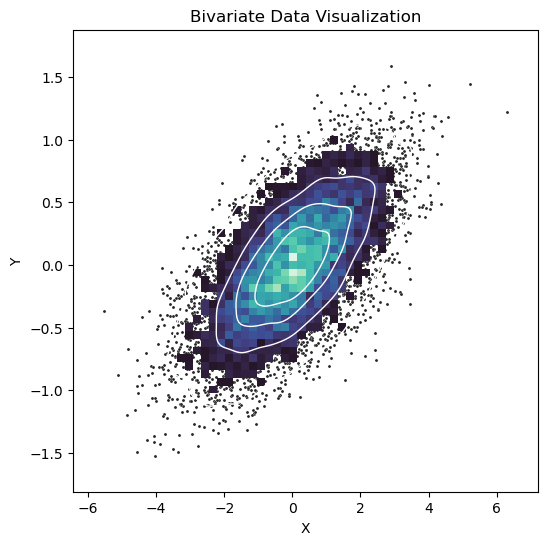

In [25]:
import seaborn as sns

# Simulating data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, 0.4), (0.4, 0.2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Creating a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=0.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bivariate Data Visualization")
plt.show()


In [46]:
# Clustering Coefficient of the Sub-Graph with 500 Rows
average_clustering_coefficient = nx.average_clustering(G)

print(f"Average clustering coefficient: {average_clustering_coefficient:.4f}")

Average clustering coefficient: 0.7801


In [37]:
# Checking if the graph is bipartite
is_bipartite = nx.bipartite.is_bipartite(G)

if is_bipartite:
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")


The graph is not bipartite.


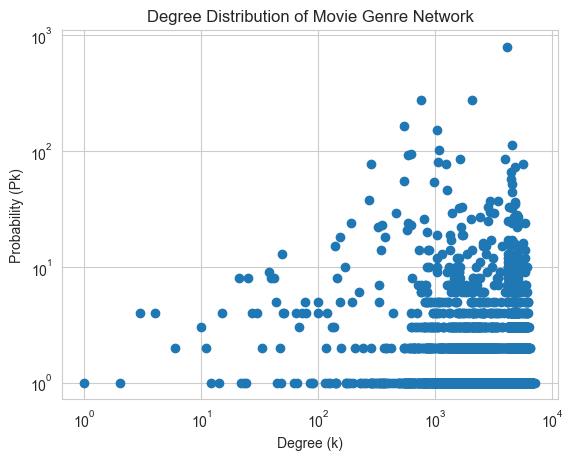

In [38]:
#5 Degree Distribution
degrees = G.degree()

# Getting the degree values
degree_values = [degree for _, degree in degrees]

# Calculating the degree frequency
degree_frequency = nx.degree_histogram(G)

# Plotting the degree distribution (log-log scale)
plt.loglog(range(len(degree_frequency)), degree_frequency, marker='o', linestyle='none')
plt.title('Degree Distribution of Movie Genre Network')
plt.xlabel('Degree (k)')
plt.ylabel('Probability (Pk)')
plt.show()


In [39]:
# Density of the Graph

print("Density of the Graph: ", nx.density(G))

Density of the Graph:  0.3081702525465499


In [40]:
# Network connectivity
print("Is connected:", nx.is_connected(G))


Is connected: True


In [43]:
# Modularity of the Graph
import community

# Detecting communities using Louvain algorithm
part = community.best_partition(G)

# Calculating modularity
modularity = community.modularity(part, G)

print(f"Modularity: {modularity}")

Modularity : 0.2609937052125228
